In [40]:
import matplotlib.pyplot as plt
import numpy as np

<h1> Programming for Physics <br> Lecture 10: Class </h1>
<a target="_blank" href="https://colab.research.google.com/github/slxuphys/tamu_phys_150/blob/master/lecture/lecture%2010%20Class.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Class
Everything in Python is an object.

Every object has a type. 

We can check the type of an object using the built in function `type()`

We have seen many built in types

-  ```int, float, string, bool, list, set, dictionary, tuple```



Type is also called class. 
```python
a = 5
type(a)  # int class
b = 3.14
type(b)  # float class
```

```

A class is a blueprint for creating objects and used to organize properties (attributes) and behavior (methods) tied to those objects.

For example, we have seen the `complex` class that represents complex numbers. 

```python
c = 3 + 4j
type(c)  # complex class
c.real  # attribute
c.imag  # attribute
c.conjugate()  # method
```

It is kind of like how RPG games have different character classes (e.g., warrior, mage, rogue), each with its own attributes (strength, intelligence, agility) and methods (attack, defend, cast spell).

In Python, we can also define our own classes to create custom objects with specific attributes and methods. This allows us to go beyond the built-in types and model real-world entities and their behaviors in our programs.



## User-defined Class

```python
class <classname>:
    a=... # class variable
    ...
    def class_func(self, argument1, argument2)
        <functions body>
    ...
```

- variables and functions made in a class is tied to the class. 

- When defining a function within a class (also known as method), the first argument refers to the object itself.

- The self parameter is a reference to the current instance of the class, and is used to access variables that belongs to the class.

- It does not have to be named self , you can call it whatever you like, but it has to be the first argument of any function in the class:

- When calling a method, the variable itself is implicitly passed into the method as the first argument.

Let's create a dog class:

In [6]:
class Dog:
    picture='🐶'
    def bark(self,n):
        print(self.picture + 'woof!'*n)

In [7]:
a = Dog()
print(type(a))
print(a.picture)
print(id(a))
a.bark(4)

b = Dog()
print(type(b))
print(b.picture)
print(id(b))

<class '__main__.Dog'>
🐶
2221772516288
🐶woof!woof!woof!woof!
<class '__main__.Dog'>
🐶
2221772518928


So far these dogs, although different objects, have the same attributes and behaviors. This is kind of boring. Let's make it more interesting by allowing different dogs to have different names and tricks.

###  ```__init__``` (double underscore)

Each dog has its own name and know its tricks

customize an object of the class with arguments

a special class function 
```python
def __init__(self, argument1, argument2)
```

The \_\_init\_\_() (__double underscores__ left and right) function is called automatically every time the class is being used to create a new object.

In [1]:
class Dog:
    picture='🐶'
    def __init__(self,name):
        self.trick_list=[]
        self.name=name
    def bark(self,n):
        print('woof!'*n)
    def learn_new_trick(self, trick):
        self.trick_list.append(trick)

In [5]:
a = Dog('DD')
print(a.name)
print(a.bark(4))
print(a.trick_list)

DD
woof!woof!woof!woof!
None
[]


Now let's make the dog learn some tricks:

In [ ]:
a.learn_new_trick('sit')
print(a.trick_list) # after the learning a new trick method, the trick list gains a new element site
a.learn_new_trick('shake')
print(a.trick_list) # another new trick


### \_\_str\_\_() method

The \_\_str\_\_() function (__two underscores__) controls what should be returned when the class object is represented as a string. It controls what is printed when printing the object using the print() function

```python
    class Dog:
        picture='🐶'
        def __init__(self,name):
            self.name=name
        def bark(self,n):
            print('woof'*n)
        def __str__(self):
            return 'hello, I\'m a dog'
```

In [3]:
class Dog:
    picture='🐶'
    def __init__(self,name):
        self.trick_list=[]
        self.name=name
    def bark(self,n):
        print('woof!'*n)
    def learn_new_trick(self,trick):
        self.trick_list.append(trick)
    def __str__(self):
        return f'hello, I\'m a dog. My name is {self.name}'


In [4]:
a=Dog('luna')
print(a)

hello, I'm a dog. My name is luna


## Let us make a Ball class
How to describe a ball? 

position, velocity, acceleration and time

the ball moves based on Newton's second law

\begin{equation}
\begin{aligned}
t_{n+1} &= t_{n} + \Delta t \\
v_{n+1} &= v_{n} + a \Delta t\\
x_{n+1} &= x_{n} + v_{n+1} \Delta t
\end{aligned}
\end{equation}

In [22]:
class Ball:
    def __init__(self,x=0,v=0,a=0, t=0):
        self.x=x
        self.v=v
        self.a=a
        self.t=t
        self.time_list=[]
        self.pos_list=[]
    def move(self,dt): #assume dt is small
        self.t=self.t+dt
        self.v=self.v+self.a*dt
        self.x=self.x+self.v*dt
    def record(self): #record the current position and time to the lists
        self.time_list.append(self.t)
        self.pos_list.append(self.x)


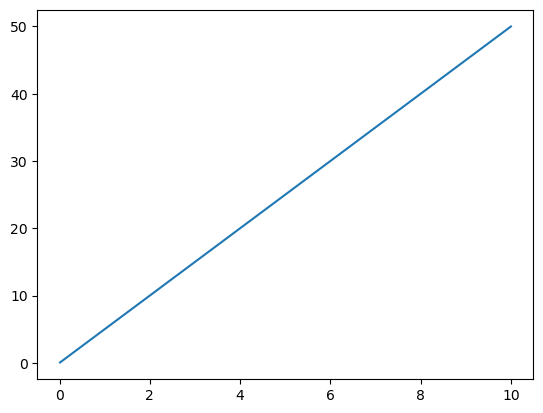

In [8]:
#simulate motion with constant speed 
import matplotlib.pyplot as plt
t_max = 10
num_step = 1000
dt = t_max/num_step
ball1 = Ball(v=5)
for i in range(num_step):
    ball1.move(dt)
    ball1.record()
plt.plot(ball1.time_list, ball1.pos_list)

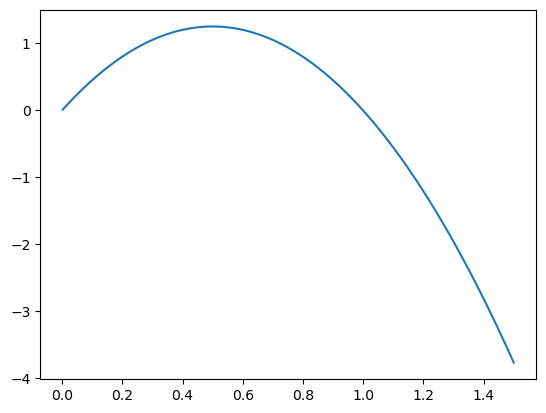

In [9]:
t_max = 1.5
num_step = 1000
dt = t_max/num_step
ball1 = Ball(v=5, a=-10)
for i in range(num_step):
    ball1.move(dt)
    ball1.record()
plt.plot(ball1.time_list, ball1.pos_list)

## Pass a class to a motion function

An object of a user defined class can be thought of as a mutable variable. It can be updated __in place__ within the function. In this case, we do not have to return it to the output.

In [25]:
class Ball:
    def __init__(self,x=0,v=0,a=0, t=0):
        self.x=x
        self.v=v
        self.a=a
        self.t=t
        self.time_list=[]
        self.pos_list=[]
    def move(self,dt): #assume dt is small
        self.t=self.t+dt
        self.v=self.v+self.a*dt
        self.x=self.x+self.v*dt
    def record(self): #record the current position and time to the lists
        self.time_list.append(self.t)
        self.pos_list.append(self.x)


def motion(t_max,num_step,ball,f_a=lambda x,v:0):
    '''
    a function that takes a ball object as an input
    it simulates the motion
    the acceleration is given by lambda function fa
    '''
    dt = t_max/num_step
    for i_step in range(num_step):
        ball.a=f_a(ball.x,ball.v)
        ball.move(dt)
        ball.record()

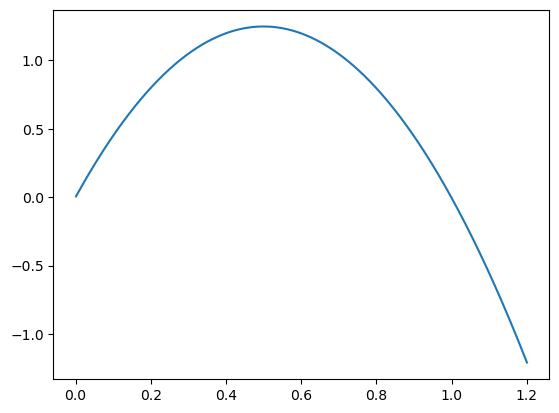

In [26]:
ball1=Ball(v=5)
motion(t_max=1.2,num_step=1000,ball=ball1,f_a=lambda x,v:-10)
plt.plot(ball1.time_list, ball1.pos_list)

---

# A ball moving in a plane

\begin{equation}
\begin{aligned}
t_{n+1} &= t_{n} + \Delta t \\
\vec v_{n+1} &= \vec v_{n} + \vec a \Delta t\\
\vec r_{n+1} &= \vec r_{n} + \vec v_{n+1} \Delta t 
\end{aligned}
\end{equation}

Use a vector instead of a number for position, velocity and acceleration
\begin{equation}
\begin{aligned}
&\vec r = (x,y) \\
&\vec v = (v_x, v_y) \\
&\vec a = (a_x, a_y) 
\end{aligned}
\end{equation}



Use numpy array to represent a vector

__We can calculate the sum and the difference of two arrays.__

__We don't need change our Class and function to simulate the 2D motion__

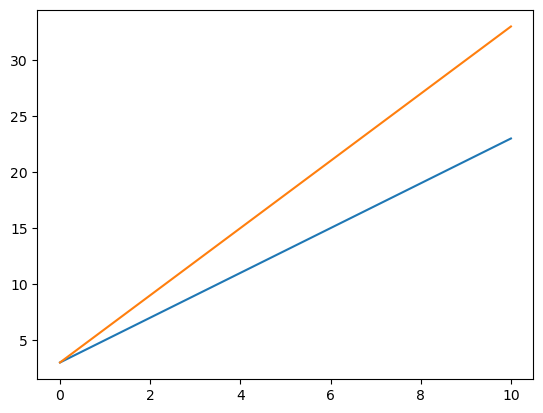

In [13]:
import numpy as np
#position, velocity and acceleration now are 2d vectors.
#the update rule still works, but requires adding two vectors (not list) together
#we need numpy array for elemental wise sum.
ball1=Ball(x=np.array([3.0,3.0]),v=np.array([2.0,3.0]), a=np.array([0.0,0.0]))
motion(t_max=10,num_step=10000,ball=ball1)
plt.plot(ball1.time_list, ball1.pos_list)#plots x position and y position as a function time 

__think about how to modify the code to simulate the projectile motion__

In the horizontal direction, the acceleration is zero. 

In the vertical direction, the acceleration is $-g$.

what should the lambda function f_a be in this case?


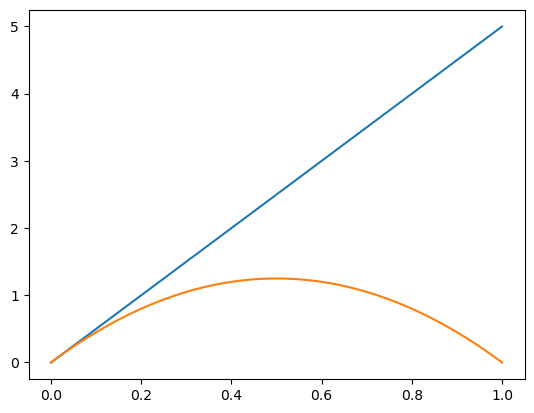

In [30]:
ball1=Ball(x=np.array([0.0,0.0]),v=np.array([5,5]))
motion(t_max=1,num_step=10000,ball=ball1, f_a=lambda x,v:np.array([0,-10]))
plt.plot(ball1.time_list, ball1.pos_list)#plots x position and y position as a function time 

How to plot the y coordinates against the x coordinates, i.e., the trajectory of the ball?

So far the position list save the coordinate of the ball as a numpy array [x,y] at each time step. 

In [22]:
ball1.pos_list

[array([0.0005   , 0.0004999]),
 array([0.001    , 0.0009997]),
 array([0.0015   , 0.0014994]),
 array([0.002   , 0.001999]),
 array([0.0025   , 0.0024985]),
 array([0.003    , 0.0029979]),
 array([0.0035   , 0.0034972]),
 array([0.004    , 0.0039964]),
 array([0.0045   , 0.0044955]),
 array([0.005    , 0.0049945]),
 array([0.0055   , 0.0054934]),
 array([0.006    , 0.0059922]),
 array([0.0065   , 0.0064909]),
 array([0.007    , 0.0069895]),
 array([0.0075  , 0.007488]),
 array([0.008    , 0.0079864]),
 array([0.0085   , 0.0084847]),
 array([0.009    , 0.0089829]),
 array([0.0095  , 0.009481]),
 array([0.01    , 0.009979]),
 array([0.0105   , 0.0104769]),
 array([0.011    , 0.0109747]),
 array([0.0115   , 0.0114724]),
 array([0.012  , 0.01197]),
 array([0.0125   , 0.0124675]),
 array([0.013    , 0.0129649]),
 array([0.0135   , 0.0134622]),
 array([0.014    , 0.0139594]),
 array([0.0145   , 0.0144565]),
 array([0.015    , 0.0149535]),
 array([0.0155   , 0.0154504]),
 array([0.016    , 0

To plot the trajectory, we need split `pos_list` into a list of x coordinates `pos_x` and a list of y coordinates `pos_y`. 
- use loop
- use numpy array 

1. Use loop and list comprehension      

Text(0, 0.5, 'y')

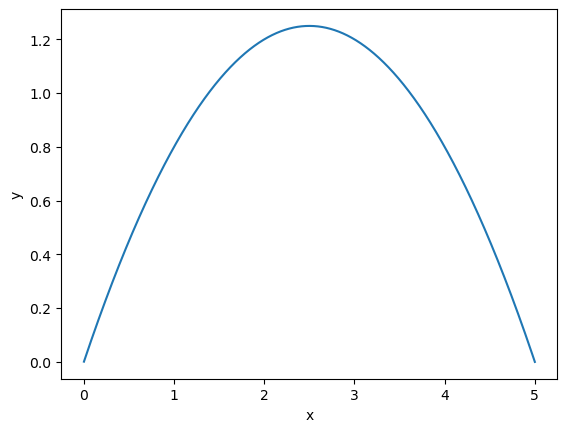

In [28]:
pos_x = [coo[0] for coo in ball1.pos_list]
pos_y = [coo[1] for coo in ball1. pos_list]
plt.plot(pos_x, pos_y) #the trajectory
plt.xlabel('x')
plt.ylabel('y')

2. Use numpy to turn `pos_list` into a 2D array with dimension $2\times$ `num_step`.  We would like to extract the first column as the pos_x list and the second column as pos_y list. 

|`pos_x`| `pos_y`|
| :--- | :---: |
|0 | 1 |
| 0.1 | 0.2 |
|...|...|

```python
pos_array = np.array(ball1.pos_list)  # shape (num_step, 2)
pos_x  = pos_array[:, 0]  # pos_x, the first column
pos_y  = pos_array[:, 1]  # pos_y, the second column
```
We can also use unpacking to achieve the same result:
```python
pos_x, pos_y = zip(*ball1.pos_list)
```

Text(0, 0.5, 'y')

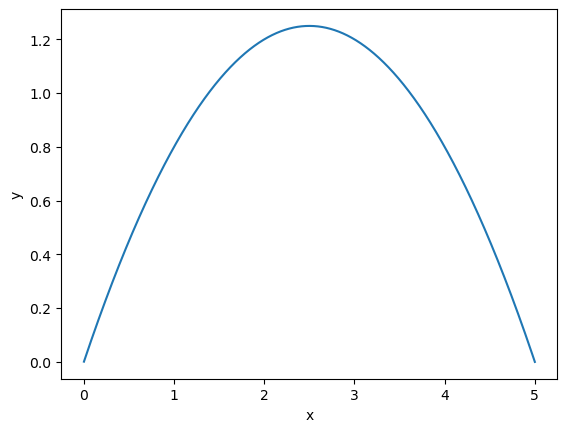

In [31]:
pos_x = np.array(ball1.pos_list)[:,0]
pos_y = np.array(ball1.pos_list)[:,1]
plt.plot(pos_x, pos_y) #the trajectory
plt.xlabel('x')
plt.ylabel('y')

Put everything together:

Text(0, 0.5, 'y')

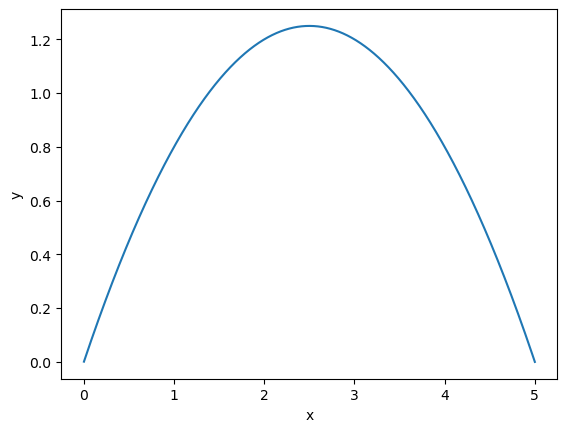

In [31]:
ball1=Ball(x=np.array([0.0,0.0]),v=np.array([5,5]), a=np.array([0.0,0.0]))
motion(t_max=1,num_step=10000,ball=ball1, f_a=lambda x,v:np.array([0,-10]))
pos_x = np.array(ball1.pos_list)[:,0]
pos_y = np.array(ball1.pos_list)[:,1]
plt.plot(pos_x, pos_y)
plt.xlabel('x')
plt.ylabel('y')

It is quite tedious to write np.array in the argument when call the Ball class. We can also include it in the class definition. 

In [34]:
class Ball:
    def __init__(self,x=0,v=0,a=0, t=0):
        self.x=np.array(x) #make sure x is a numpy array
        self.v=np.array(v) #make sure v is a numpy array
        self.a=np.array(a) #make sure a is a numpy array
        self.t=t
        self.time_list=[]
        self.pos_list=[]
    def move(self,dt):
        self.t=self.t+dt
        self.v=self.v+self.a*dt
        self.x=self.x+self.v*dt
    def record(self): #record the current position and time to the lists
        self.time_list.append(self.t)
        self.pos_list.append(self.x)
    def clear(self): #clear the history
        self.time_list=[]
        self.pos_list=[]


def motion(t_max,num_step,ball,f_a=lambda x,v:0):
    '''
    a function that takes a ball object as an input
    it simulates the motion
    the acceleration is given by lambda function fa
    '''
    dt = t_max/num_step
    for i_step in range(num_step):
        ball.a=np.array(f_a(ball.x,ball.v)) #make sure a is a numpy array
        ball.move(dt)
        ball.record()

Text(0, 0.5, 'y')

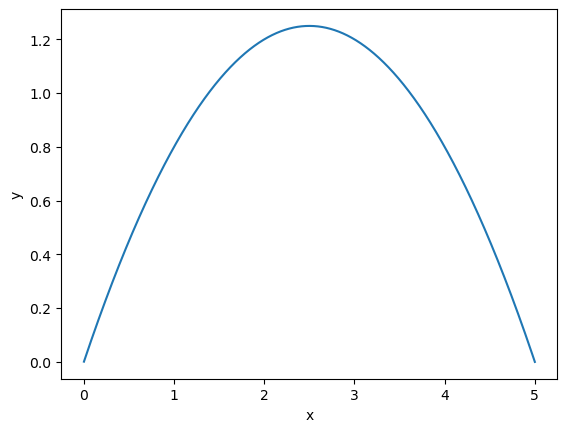

In [35]:
ball1=Ball(x=[0,0],v=[5,5],a=[0,0])
motion(t_max=1,num_step=10000,ball=ball1, f_a=lambda x,v:[0,-10])
pos_x, pos_y = np.array(ball1.pos_list).T
plt.plot(pos_x, pos_y)
plt.xlabel('x')
plt.ylabel('y')

### Kepler Motion (Earth orbits around Sun)

$$
\vec a = - k \frac{\vec r} {|r|^3}
$$

(-2.750002089697159, 1.178571528080817, -1.229579617236595, 1.7373580138190978)

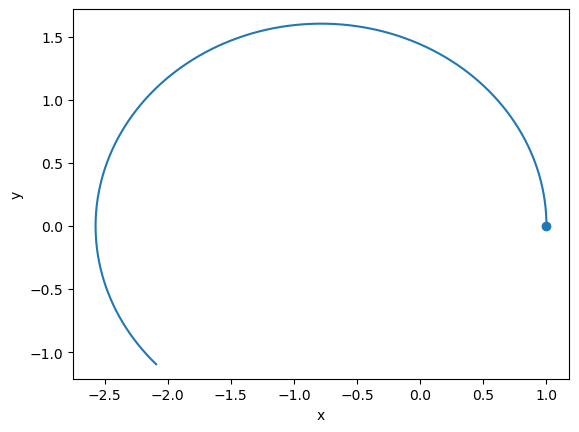

In [37]:
ball1=Ball(x=[1,0],v=[0, 1.2],a=[0,0])
plt.scatter(1, 0)
motion(t_max=10,num_step=10000,ball=ball1, f_a=lambda r,v: - r/np.linalg.norm(r)**3 )
pos_x = np.array(ball1.pos_list)[:,0]
pos_y = np.array(ball1.pos_list)[:,1]
plt.plot(pos_x, pos_y)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')


__think about how to modify the code to simulate the pool table__

How to update the function motion to include the boundary?